# Komentarz
Dzień dobry, 
ja się w sumie pogubiłam z tymi zmianami terminów dosyć mocno i byłam przekonana, że to zadanie jest na za tydzień, a tu czerwone "Due yesterday" na Teamsie zrobiło mi niespodziankę ;) Moja wina oczywiście, więc przepraszam za ewentualne niedogodności ze sprawdzaniem.

# Lab7: Word embeddings

In [37]:
import warnings

import gensim.models
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold

In [2]:
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

## Read the documentation of word2vec in Gensim library.

## Download polish word embeddings for word2vec github/Google drive:

### with 100 dimensionality

Model pobrano z [linku podanego w instrukcji](https://github.com/sdadas/polish-nlp-resources/releases/download/v1.0/word2vec.zip).

In [7]:
model_100 = gensim.models.KeyedVectors.load('../word2vec/word2vec_100_3_polish.bin')

In [8]:
print(model_100.most_similar(positive=['lekarz', 'kobieta'], negative=['meżczyzna'], topn=1))

print(model_100.most_similar(positive=['lekarka', 'meżczyzna'], negative=['kobieta'], topn=1))

[('pielęgniarka', 0.664936363697052)]
[('mannon', 0.5751891136169434)]


### with 300 dimensionality

Model pobrano z [linku podanego w instrukcji](https://witedupl-my.sharepoint.com/personal/dadass_wit_edu_pl/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fdadass%5Fwit%5Fedu%5Fpl%2FDocuments%2FModels%2Fword2vec%2Fword2vec%5F300%5F3%2E7z&parent=%2Fpersonal%2Fdadass%5Fwit%5Fedu%5Fpl%2FDocuments%2FModels%2Fword2vec&originalPath=aHR0cHM6Ly93aXRlZHVwbC1teS5zaGFyZXBvaW50LmNvbS86dTovZy9wZXJzb25hbC9kYWRhc3Nfd2l0X2VkdV9wbC9FUTdRQTZQa1B1cEJ0Wll5UDhrYWFmTUIwejlGZEhmTUU3a3htX3RjUldoOWhBP3J0aW1lPVdRQXVQVG1nMkVn).

In [3]:
model_300 = gensim.models.KeyedVectors.load('../word2vec/word2vec_300_3_polish.bin')

In [4]:
print(model_300.most_similar(positive=['lekarz', 'kobieta'], negative=['meżczyzna'], topn=1))

print(model_300.most_similar(positive=['lekarka', 'meżczyzna'], negative=['kobieta'], topn=1))

[('pielęgniarka', 0.6607284545898438)]
[('mannon', 0.4515388011932373)]


## Using the downloaded models find the most similar words for the following expressions:
* kpk
* szkoda
* wypadek
* kolizja
* nieszczęście
* rozwód

## Display 5 most similar words according to each model.

In [10]:
for word in ['kpk', 'szkoda', 'wypadek', 'kolizja', 'nieszczęście', 'rozwód']:
    print(word)
    print('  - model_100:')
    for match in model_100.most_similar(positive=[word], topn=5):
        print(f'    - {match[0]} ({match[1]})')
    print('  - model_300:')
    for match in model_300.most_similar(positive=[word], topn=5):
        print(f'    - {match[0]} ({match[1]})')

kpk
  - model_100:
    - kilopond (0.6665806770324707)
    - kpzs (0.6363496780395508)
    - kpu (0.6300562024116516)
    - sownarkomu (0.6254925727844238)
    - wcik (0.6224358677864075)
  - model_300:
    - ksh (0.5774794220924377)
    - cywilnego (0.5498510599136353)
    - postępowania (0.5285828113555908)
    - kilopond (0.5151568055152893)
    - kkkw (0.48344212770462036)
szkoda
  - model_100:
    - krzywda (0.6817898750305176)
    - pożytek (0.6121943593025208)
    - strata (0.5968126654624939)
    - ryzyko (0.5745570659637451)
    - uszczerbek (0.5639551877975464)
  - model_300:
    - uszczerbek (0.6027276515960693)
    - krzywda (0.5920778512954712)
    - strata (0.550269365310669)
    - despekt (0.5382484197616577)
    - pożytek (0.531347393989563)
wypadek
  - model_100:
    - przypadek (0.7544811964035034)
    - okoliczności (0.7268072366714478)
    - padku (0.6788284182548523)
    - incydent (0.6418948173522949)
    - zdarzenie (0.6114422082901001)
  - model_300:
    - przyp

##  Find the most similar words for the following expressions (average the representations for each word):
* sąd najwyższy
* trybunał konstytucyjny
* szkoda majątkowy
* kodeks cywilny
* sąd rejonowy

## Display 7 most similar words according to each model.

In [20]:
for expression in ['sąd najwyższy', 'trybunał konstytucyjny', 'szkoda majątkowy', 'kodeks cywilny', 'sąd rejonowy']:
    print(expression)
    
    first_word, second_word = expression.split(' ')

    print('  - model_100:')
    
    result_100 = [
        np.mean(values) 
        for values 
        in zip(
            np.array(model_100[first_word]), 
            np.array(model_100[second_word])
        )
    ]
    for match in model_100.similar_by_vector(np.array(result_100))[:7]:
        print(f'    - {match[0]} ({match[1]})')
        
    print('  - model_300:')
    
    result_300 = [
        np.mean(values) 
        for values 
        in zip(
            np.array(model_300[first_word]), 
            np.array(model_300[second_word])
        )
    ]
    for match in model_300.similar_by_vector(np.array(result_300))[:7]:
        print(f'    - {match[0]} ({match[1]})')

sąd najwyższy
  - model_100:
    - sąd (0.8644266128540039)
    - trybunał (0.7672435641288757)
    - najwyższy (0.7527138590812683)
    - trybunat (0.6843459010124207)
    - sędzia (0.6718415021896362)
    - areopag (0.6571060419082642)
    - sprawiedliwość (0.6562486886978149)
  - model_300:
    - sąd (0.8261206150054932)
    - trybunał (0.711520791053772)
    - najwyższy (0.7068409323692322)
    - sędzia (0.6023203730583191)
    - sądowy (0.5670486688613892)
    - trybunat (0.5525928735733032)
    - sprawiedliwość (0.5319530367851257)
trybunał konstytucyjny
  - model_100:
    - trybunał (0.9073251485824585)
    - konstytucyjny (0.7998723387718201)
    - sąd (0.7972990274429321)
    - bunał (0.7729247808456421)
    - senat (0.7585273385047913)
    - bunału (0.7441976070404053)
    - trybunat (0.7347140908241272)
  - model_300:
    - trybunał (0.8845913410186768)
    - konstytucyjny (0.7739969491958618)
    - sąd (0.7300779819488525)
    - trybunat (0.6758428812026978)
    - senat (0.

## Find the result of the following equations (5 top results, both models):

### sąd + konstytucja - kpk

In [23]:
print('model_100:')

for match in model_100.most_similar(positive=['sąd', 'konstytucja'], negative=['kpk'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['sąd', 'konstytucja'], negative=['kpk'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - trybunał (0.6436409950256348)
  - ustawa (0.6028786897659302)
  - elekcja (0.5823959112167358)
  - deklaracja (0.5771891474723816)
  - dekret (0.5759621262550354)
model_300:
  - trybunał (0.5860734581947327)
  - senat (0.5112544298171997)
  - ustawa (0.5023636817932129)
  - dekret (0.48704710602760315)
  - władza (0.4868926703929901)


### pasażer + kobieta - mężczyzna

In [24]:
print('model_100:')

for match in model_100.most_similar(positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - pasażerka (0.7234811186790466)
  - stewardessa (0.6305270195007324)
  - stewardesa (0.6282645463943481)
  - taksówka (0.619726300239563)
  - podróżny (0.614517092704773)
model_300:
  - pasażerka (0.6741673946380615)
  - stewardesa (0.5810248255729675)
  - stewardessa (0.5653151273727417)
  - podróżny (0.5060371160507202)
  - pasażerski (0.4896503686904907)


### pilot + kobieta - mężczyzna

In [25]:
print('model_100:')

for match in model_100.most_similar(positive=['pilot', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['pilot', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - nawigator (0.6925703287124634)
  - oblatywacz (0.6686224937438965)
  - lotnik (0.6569937467575073)
  - pilotka (0.6518791913986206)
  - awionetka (0.6428645849227905)
model_300:
  - pilotka (0.6108255386352539)
  - lotnik (0.6020804047584534)
  - stewardesa (0.5943204760551453)
  - nawigator (0.5849766731262207)
  - oblatywacz (0.5674178600311279)


### lekarz + kobieta - mężczyzna

In [83]:
print('model_100:')

for match in model_100.most_similar(positive=['lekarz', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['lekarz', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - lekarka (0.7690489292144775)
  - ginekolog (0.7575511336326599)
  - pediatra (0.7478542923927307)
  - psychiatra (0.732271671295166)
  - położna (0.7268943786621094)
model_300:
  - lekarka (0.7388788461685181)
  - pielęgniarka (0.6719920635223389)
  - ginekolog (0.658279299736023)
  - psychiatra (0.6389409303665161)
  - chirurg (0.6305986642837524)


### nauczycielka + mężczyzna - kobieta

In [27]:
print('model_100:')

for match in model_100.most_similar(positive=['nauczycielka', 'mężczyzna'], negative=['kobieta'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['nauczycielka', 'mężczyzna'], negative=['kobieta'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - uczennica (0.7441667318344116)
  - studentka (0.7274973392486572)
  - nauczyciel (0.7176114916801453)
  - wychowawczyni (0.7153530120849609)
  - koleżanka (0.678418755531311)
model_300:
  - nauczyciel (0.6561620235443115)
  - wychowawczyni (0.6211140155792236)
  - uczennica (0.6142012476921082)
  - koleżanka (0.5501158237457275)
  - przedszkolanka (0.5497692823410034)


### przedszkolanka + mężczyzna - 'kobieta

In [28]:
print('model_100:')

for match in model_100.most_similar(positive=['przedszkolanka', 'mężczyzna'], negative=['kobieta'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['przedszkolanka', 'mężczyzna'], negative=['kobieta'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - stażysta (0.6987776756286621)
  - wychowawczyni (0.6618361473083496)
  - kreślarka (0.6590923070907593)
  - pielęgniarz (0.6492814421653748)
  - siedmiolatek (0.6483469009399414)
model_300:
  - stażysta (0.5117638111114502)
  - pierwszoklasista (0.49398648738861084)
  - wychowawczyni (0.49037522077560425)
  - praktykant (0.48884207010269165)
  - pielęgniarz (0.4795262813568115)


### samochód + rzeka - droga

In [29]:
print('model_100:')

for match in model_100.most_similar(positive=['samochód', 'rzeka'], negative=['droga'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['samochód', 'rzeka'], negative=['droga'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - jeep (0.6142987608909607)
  - buick (0.5962571501731873)
  - dżip (0.5938510894775391)
  - ponton (0.580719530582428)
  - landrower (0.5799552202224731)
model_300:
  - dżip (0.5567235946655273)
  - jeep (0.5533617734909058)
  - auto (0.5478508472442627)
  - ciężarówka (0.5461742281913757)
  - wóz (0.5204571485519409)


## Using the t-SNE algorithm compute the projection of the random 1000 words with the following words highlighted (both models):
* szkoda
* strata
* uszczerbek
* krzywda
* niesprawiedliwość
* nieszczęście
* kobieta
* mężczyzna
* pasażer
* pasażerka
* student
* studentka
* lekarz
* lekarka


In [129]:
words = [
    'szkoda',
    'strata',
    'uszczerbek',
    'krzywda',
    'niesprawiedliwość',
    'nieszczęście',
    'kobieta',
    'mężczyzna',
    'pasażer',
    'pasażerka',
    'student',
    'studentka',
    'lekarz',
    'lekarka',
]

In [94]:
random_words = np.random.choice(list(model_100.wv.vocab), 1000)

random_words[:10]

array(["nf'", 'makrofitowego', 'ostroszowic', 'copulaverat', 'antysaska',
       'halannę', 'pięciomarkówek', 'tovą', 'миле', 'mililani'],
      dtype='<U77')

In [144]:
def draw_TSNE_plot(model, highlighted_words, random_words):
    random_word_number = len(random_words)
    highlighted_word_number = len(highlighted_words)
    
    color_map = plt.cm.jet(np.linspace(0, 1, highlighted_word_number))
    
    random_word_vectors = [model.wv.get_vector(word) for word in random_words]
    highlighted_word_vectors = [model.wv.get_vector(word) for word in highlighted_words]
    
    result = sklearn.manifold.TSNE(n_components=2)\
        .fit_transform(random_word_vectors + highlighted_word_vectors)
    
    plt.figure(figsize=(15, 10))

    plt.scatter(result[:random_word_number, 0], result[:random_word_number, 1], color='lightgray')

    for index in range(highlighted_word_number):
        plt.scatter(
            result[random_word_number + index, 0], 
            result[random_word_number + index, 1], 
            label=highlighted_words[index], 
            color=color_map[index],
            s=100
        )

    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    
    plt.legend()
    
    plt.show()

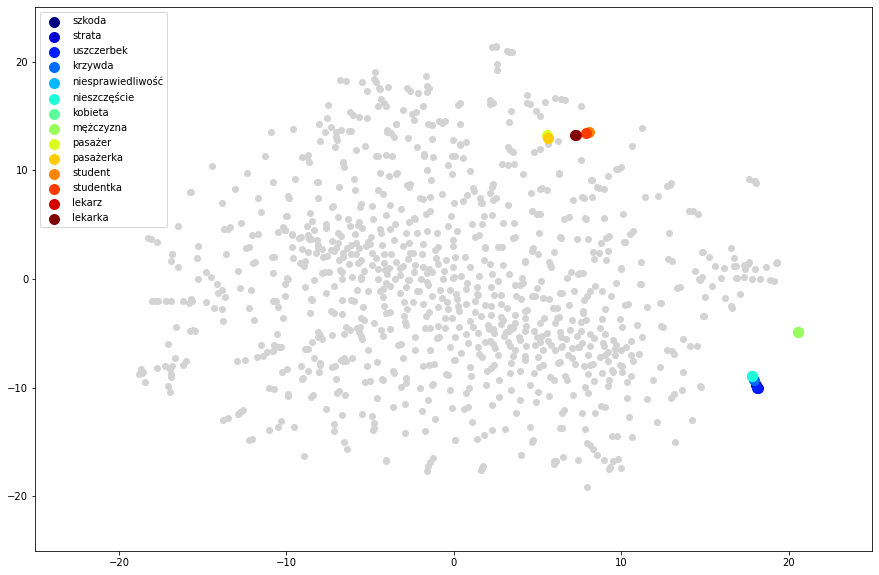

In [149]:
draw_TSNE_plot(model_100, words, random_words)

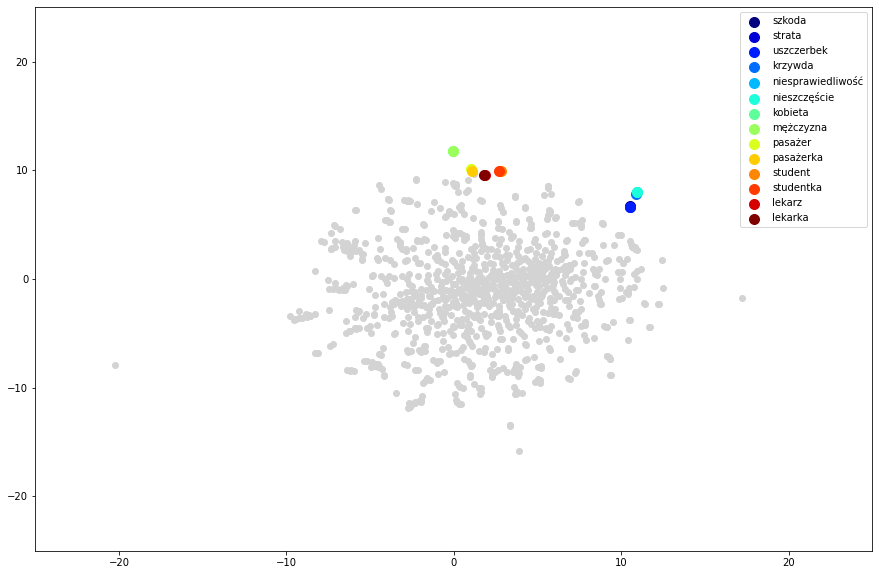

In [148]:
draw_TSNE_plot(model_300, words, random_words)

## Answer the following questions:
### Compare results for all experiments with respect to the employed models (100 and 300-d)?
W części przypadków wyniki różnią się, jednak mają wiele wspólnych elementów. Przykładowo wśród słów najbardziej podobnych do słowa "rozwód" cztery z pięciu pierwszych wyników są takie same w przypadku obydwu modeli, choć kolejność nieco się różni. Inaczej wygląda sytuacja na przykład dla skrótu "kpk", gdzie wśród umiarkowane sensownych wyników modelowi o wymiarowści 300 udało się zwrócić odpowiedzi takie jak "postępowania" czy "cywilnego", podczas gdy model-100 nie zwrócił żadnych słów związanych z prawem. Warto też zauważyć, że model-100 dał swoim rezultatem większy score, choć nie wydają się one wartościowe.

Ze swojej strony chciałam też dodać, że osobiście miałam pewne problemy z wczytaniem modelu-300 do ograniczonej rozmiarowo pamięci swojego komputera, choć nie jest to oczywiście uwaga odnośnie wyników, a raczej odnośnie samego narzędzia.

### Compare results for single words and MWEs.

W obydwu przypadkach udało się uzyskać raczej sensowne wyniki uwzględniające słowa powiązane semantycznie z zadanymi frazami. W przypadku wyrażeń wielowyrazowych udało się całkiem skutecznie odnaleźć powiązane słowa klucze, jednak wśród wyników znalazło się trochę bardziej egzotycznych fraz takich jak "teodozjańskim" czy "amiatyński" oraz fragmenty słów takie jak "bunał" i "bunału". Wyniki dla MWE uwzględniają też poszczególne słowa wchodzące w skład danego wyrażenia.

### How the results for MWEs could be improved?
Można by odfiltrować spośród wyników wyrazy wchodzące bezpośrednio w skład danego MWE. Ciekawe mogłoby być również zastosowanie innej metryki niż zwykła średnia.


### Are the results for albegraic operations biased?
Wydaje mi się, że w modelu brakuje reprezentacji feminatywów. Przykładowo dla `anestezjolog + kobieta - mężczyzna` spodziewałabym się wyniku "anestezjolożka", jednak uzyskałam jedynie odpowiedzi takie jak "lekarka", "pacjentka", "pielęgniarka". Patrząc na inne odpowiedzi okołomedyczne, to wśród wyników w przypadku sumowania słowa "kobieta" często pojawiają się słowa takie jak "położna" czy "ginekolog" (a nie "ginekolożka"). Ma to pewien sens, ponieważ ich pacjentami w większości są kobiety (choć tak naprawdę nie tylko, ale statystycznie raczej tak by to wychodziło). Jak chodzi o analogiczną operację `lekarka + mężczyzna - kobieta`, to nie jestem pewna, czy istnieje "męski odpowiednik ginekologa" - wyszukiwarka sugeruje odpowiedź "androlog", ale w sumie nigdy nie słyszałam tej nazwy, więc nie oczekiwałabym że znajdę ją w wynikach tej operacji. 

Wydaje mi się, że słyszałam legendy o tym, że takie modele za odpowiednika lekarza uznawały pielęgniarkę, a za odpowiednika szefa sekretarkę, jednak teraz na pierwszym miejscu działania `lekarz + kobieta - mężczyzna` faktycznie znalazła się "lekarka". Zaskoczył mnie też stosunkowo dobry wynik "pilotki". "Informatyczka" wypadła słabo, ale "programistce" udało się zająć zaszczytne drugie miejsce w modelu-300 tuż za "oprogramowaniem".

#### Informatyczka?

In [84]:
print('model_100:')

for match in model_100.most_similar(positive=['informatyk', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['informatyk', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - informatyczny (0.7079552412033081)
  - cybernetyk (0.6913930177688599)
  - informatyka (0.6769238710403442)
  - elektronik (0.6690592169761658)
  - komputeryzacja (0.6623849868774414)
model_300:
  - cybernetyk (0.6038252115249634)
  - informatyczny (0.5885249376296997)
  - matematyk (0.5742408037185669)
  - informatyka (0.5728007555007935)
  - teleinformatyka (0.5630858540534973)


#### Programistka?

In [85]:
print('model_100:')

for match in model_100.most_similar(positive=['programista', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')
    
print('model_300:')

for match in model_300.most_similar(positive=['programista', 'kobieta'], negative=['mężczyzna'], topn=5):
    print(f'  - {match[0]} ({match[1]})')

model_100:
  - kompilator (0.6839914321899414)
  - oprogramowanie (0.6807354688644409)
  - edytor (0.6688310503959656)
  - aplikacja (0.6596279144287109)
  - implementacja (0.6587384343147278)
model_300:
  - oprogramowanie (0.601147472858429)
  - programistka (0.5788481831550598)
  - aplikacja (0.5774339437484741)
  - kompilator (0.5652058124542236)
  - edytor (0.5385540723800659)


W pewnym sensie analogiczne problemy wystąpiły przy operacji `przedszkolanka + mężczyzna - kobieta`, jednak wydaje mi się, że utworzenie formy męskiej od tego słowa nadal sprawia nam trochę większy problem słowotwórczy niż "anestezjolożka" czy "informatyczka".

Przy powyższych rozważaniach poczyniłam założenie, że taki model algebraiczny ma w ogóle sens dla języka, jednak prawdę mówiąc, nie jestem co do tego do końca przekonana i nie do końca wiem, jakie odpowiedzi byłyby pozbawione _biasu_.

### According to t-SNE: do representations of similar word cluster together?

Powstały w przybliżeniu następujące klastry:
* 'szkoda', 'strata', 'uszczerbek', 'krzywda', 'niesprawiedliwość', 'nieszczęście',
* 'kobieta', 'mężczyzna',
* 'pasażer', 'pasażerka',
* 'student', 'studentka', 'lekarz', 'lekarka'.

Wydaje mi się, że jest to całkiem sensowny podział tych pojęć. Słowa opisujące ludzi znajdują się bliżej siebie nawzajem niż słów związanych z katastrofą.